<a href="https://colab.research.google.com/github/tanvi0605/Image-Analysis-for-Automated-Product-Recognition/blob/main/Training_Fruit_veg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  #upto 6
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


DATA PREPROCESSING

In [3]:
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit and vegetable recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3115 files belonging to 36 classes.


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit and vegetable/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 341 files belonging to 36 classes.


In [5]:
cnn=tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [12]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 659s 7s/step - accuracy: 0.0383 - loss: 34.5826 - val_accuracy: 0.1026 - val_loss: 3.4738
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.0546 - loss: 3.8910 - val_accuracy: 0.1965 - val_loss: 3.3656
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.0912 - loss: 4.0030 - val_accuracy: 0.2375 - val_loss: 2.9049
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.1427 - loss: 3.5077 - val_accuracy: 0.1408 - val_loss: 3.7203
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.1756 - loss: 3.2409 - val_accuracy: 0.4252 - val_loss: 2.4527
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.2466 - loss: 3.0628 - val_accuracy: 0.3930 - val_loss: 2.7807
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.3329 - loss: 3.1667 - val_accuracy: 0.6129 - val_loss: 1.8841
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.3991 - loss: 2.5339 - val_accuracy: 0.6158 - 

In [14]:
cnn.save('trained_model.h5')

In [15]:
training_history.history

{'accuracy': [0.039165329188108444,
  0.06035313010215759,
  0.09309791028499603,
  0.1393258422613144,
  0.19967897236347198,
  0.2757624387741089,
  0.34478330612182617,
  0.4089887738227844,
  0.47865167260169983,
  0.553130030632019,
  0.5762439966201782,
  0.6410914659500122,
  0.7030497789382935,
  0.6934189200401306,
  0.7136436700820923,
  0.742215096950531,
  0.773354709148407,
  0.7788121700286865,
  0.8099518418312073,
  0.808346688747406,
  0.8231139779090881,
  0.8362760543823242,
  0.8276083469390869,
  0.8497592210769653,
  0.8468700051307678,
  0.8520064353942871,
  0.8712680339813232,
  0.8670946955680847,
  0.8808988928794861,
  0.8805778622627258],
 'loss': [11.078876495361328,
  3.8241658210754395,
  3.905602216720581,
  3.482151746749878,
  3.1835920810699463,
  3.0467031002044678,
  2.7817747592926025,
  2.8466947078704834,
  2.215994358062744,
  1.8103491067886353,
  1.8034236431121826,
  1.5665456056594849,
  1.2543585300445557,
  1.4236085414886475,
  1.3851203

In [16]:
import json
with open('training_hist.json','w')as f:
 json.dump(training_history.history,f)

In [17]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


CALCULATING ACCURACY

In [18]:
print("validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set accuracy: 96.18768095970154 %


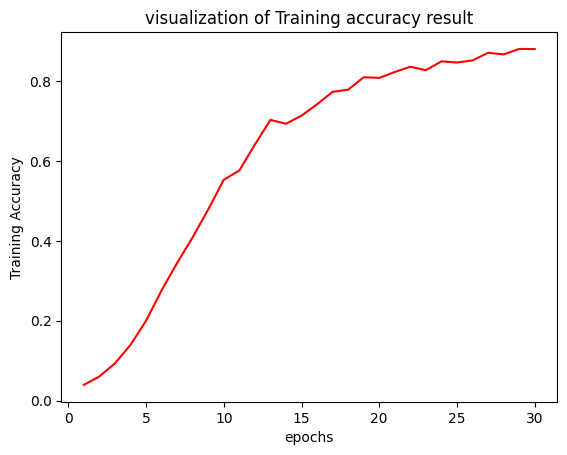

In [19]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('epochs')
plt.ylabel('Training Accuracy')
plt.title('visualization of Training accuracy result')
plt.show()

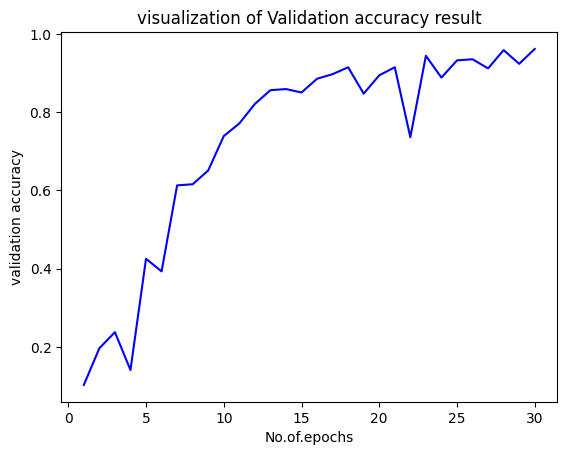

In [20]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No.of.epochs')
plt.ylabel('validation accuracy')
plt.title('visualization of Validation accuracy result')
plt.show()